<a href="https://colab.research.google.com/github/crimcrist/Machine-Learning/blob/main/session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITANIC EDA**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/train.csv"
df = pd.read_csv(path)

Mounted at /content/drive


# **DATA OVERVIEW**

In [4]:
print("Data Shape:", df.shape)

print("\nBaris pertama data:")
display(df.head())

print("\nInformasi dataset:")
print(df.info())

print("\nStatistik ringkas:")
display(df.describe(include="all"))

Data Shape: (891, 12)

Baris pertama data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Statistik ringkas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# **CEK MISSING VALUE**

Missing Value dapat menyebabkan
1. Analisi statistik menjadi tidak akurat
2. Model Machine Learning menjadi bias/error
3. Hasil akhir dapat salah karena data tidak lengkap.

Maka harus mengetahui mana kolom yang punya missing values,
dan berapa nilai yang hilang dan perlu dihapus atau disi

In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Jumlah Missing Values per Kolom:")
display(missing)

Jumlah Missing Values per Kolom:


,0
Cabin,687
Age,177
Embarked,2


In [7]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Persentase Missing Values(%):")
display(missing_percent[missing_percent > 0].sort_values(ascending=False))

Persentase Missing Values(%):


,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467


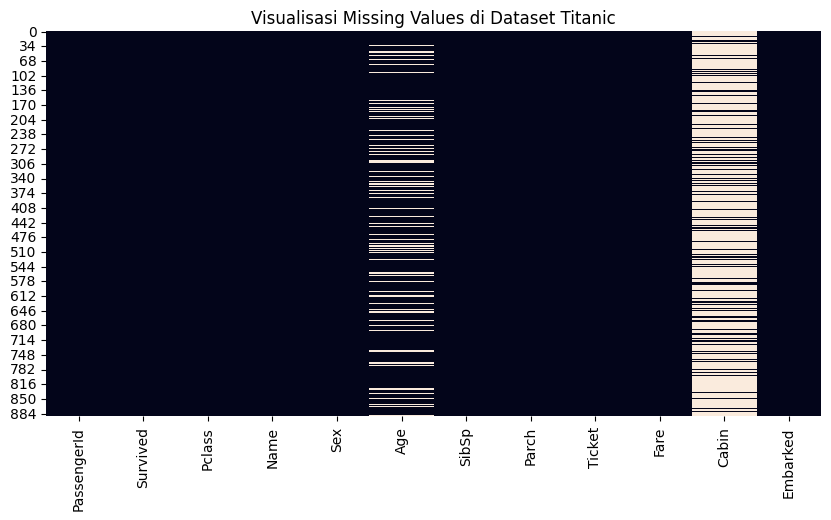


Penjelasan:
- Kolom Cabin memiliki banyak missing values, bisa jadi dihapus atau diganti dengan kategori 'Unknown'.
- Kolom Age memiliki sebagian nilai hilang, bisa diimputasi dengan median atau berdasarkan Pclass.
- Kolom Embarked sedikit missing,bisa diisi dengan mode (nilai terbanyak).



In [8]:
  plt.figure(figsize=(10, 5))
  sns.heatmap(df.isnull(), cbar=False)
  plt.title("Visualisasi Missing Values di Dataset Titanic")
  plt.show()

print("""
Penjelasan:
- Kolom Cabin memiliki banyak missing values, bisa jadi dihapus atau diganti dengan kategori 'Unknown'.
- Kolom Age memiliki sebagian nilai hilang, bisa diimputasi dengan median atau berdasarkan Pclass.
- Kolom Embarked sedikit missing,bisa diisi dengan mode (nilai terbanyak).
""")

In [9]:
# Cek total missing value per kolom
print("Jumlah missing value sebelum dibersihkan:")
print(df.isnull().sum())

# Isi nilai kosong
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)

print("\nJumlah missing value sesudah dibersihkan:")
print(df.isnull().sum())


Jumlah missing value sebelum dibersihkan:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Jumlah missing value sesudah dibersihkan:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


/tmp/ipython-input-1826568740.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1826568740.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

df['Age'].fillna(df['Age'].median(), inplace=True)
- *Kenapa menggunakan median?*
Karena median lebih tahan terhadap outlier (nilai ekstrem).
Misalnya di kolom Age ada umur 5, 6, 7, 8. tapi juga ada satu orang umur 80.
Kalau kamu pakai mean, nilai 80 itu bisa bikin rata-ratanya jadi tinggi banget.
Tapi kalau pakai median, nilai ekstrem kayak gitu gak berpengaruh besar.

Jadi Kalau data punya distribusi normal (nggak banyak outlier), bisa pakai mean.
Kalau data condong atau banyak nilai ekstrem,lebih aman pakai median.

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
- *Kenapa Menggunakan Mode?*
karena data tipe kategorikal (bukan angka, tapi teks kategori).
Kalau ada nilai kosong, kita perlu ngisi dengan kategori yang paling sering muncul.
Karena mode mewakili kategori paling umum, jadi tidak terlalu bias.
Kalau diisi dengan nilai random, bisa ngaco hasil analisis.
Kalau dihapus, bisa ngilangin data penting.


df['Cabin'].fillna('Unknown', inplace=True)
- *Kenapa Menggunakan Uknown*
Kolom Cabin berisi nomor kabin di kapal kayak C85, E46, G6, dsb.
Masalahnya Lebih dari 70% datanya kosong (NaN). Kalau diisi dengan mode, gak logis karena kabin itu unik per orang.
Kalau dihapus,dapat kehilangan banyak baris data.
Jadi solusi aman, diisi dengan 'Unknown', supaya model atau analisis tetap bisa jalan tapi tanpa menebak-nebak data palsu.


# **UNIVARIATE ANALYSIS**

(analisis satu variabel secara terpisah)

Untuk memahami distribusi, nilai ekstrem, dan pola unik dari tiap fitur.

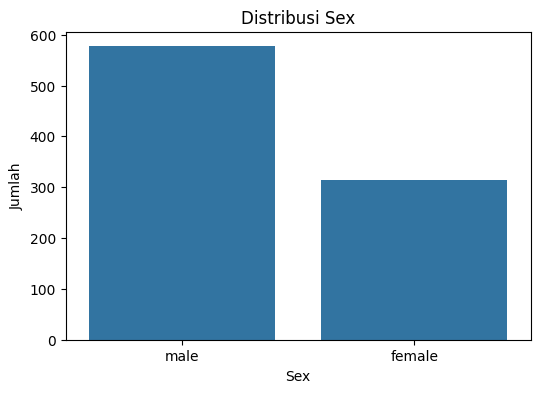

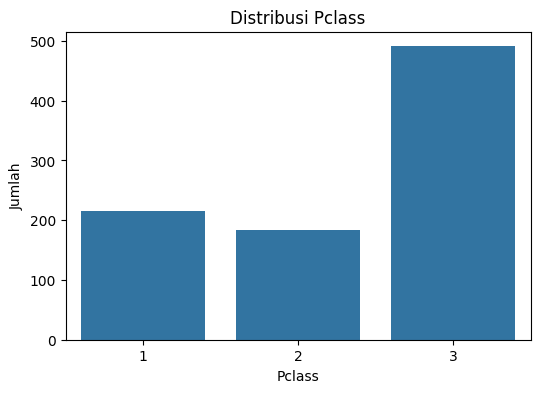

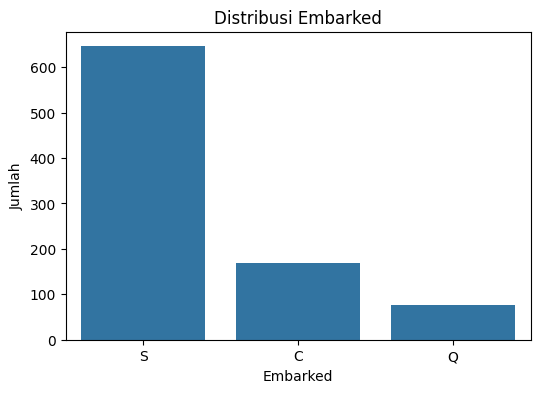

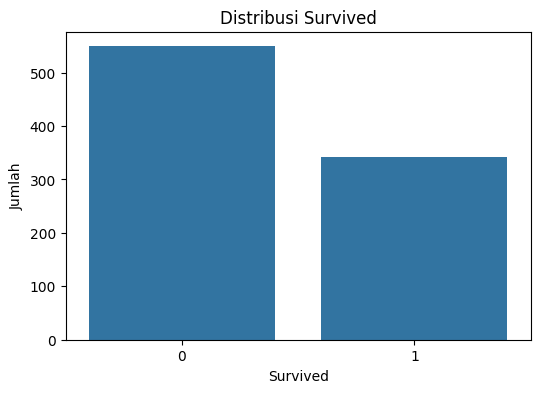

In [10]:
# Categorical Features
cat_cols = ['Sex', 'Pclass', 'Embarked', 'Survived']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.show()

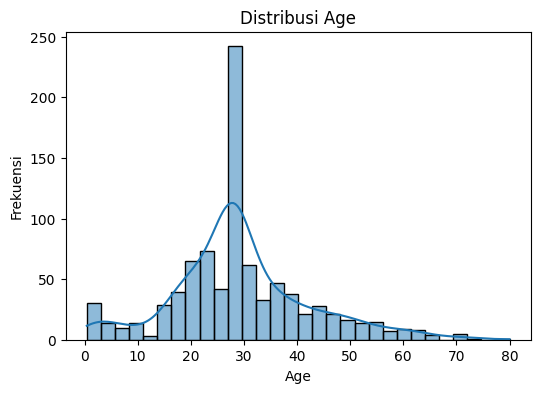

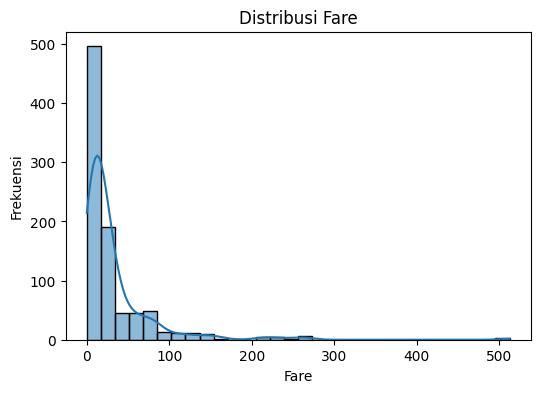

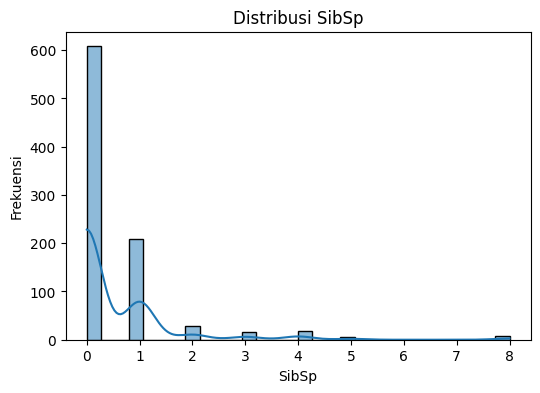

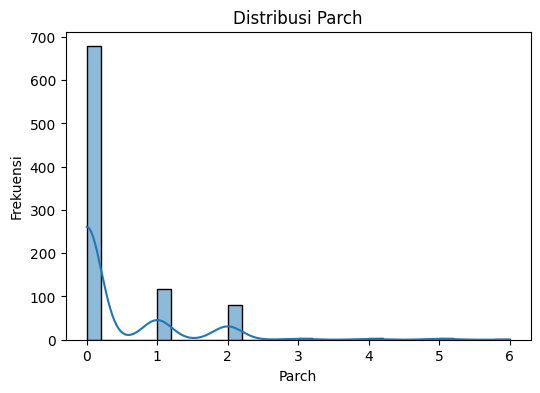

In [11]:
# Numerical Features
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()


**Penjelasan Univariate Analysis**:
- Distribusi Age mirip normal, tapi ada beberapa outlier di atas 60 tahun.
- banyak penumpang bayar tiket murah, tapi ada yang sangat mahal.
- lebih banyak laki-laki, tapi perempuan punya survival rate lebih tinggi.
- Pclass : penumpang kelas 3 mendominasi.

# **MULTIVARIATE ANALYSIS**
 (analisis hubungan lebih dari dua variabel.)

 Tujuannya untuk mencari interaksi kompleks antar fitur, misalnya
 - Bagaimana pengaruh Gender  Pclass terhadap Survival
- Apakah Fare dan Age bersama-sama memengaruhi peluang selamat

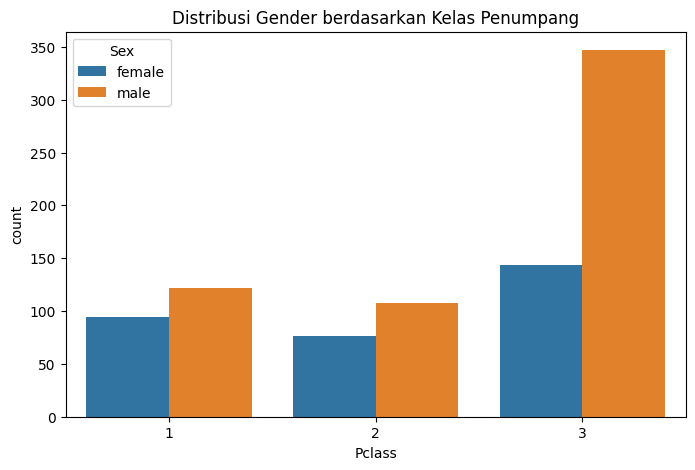

<Figure size 800x500 with 0 Axes>

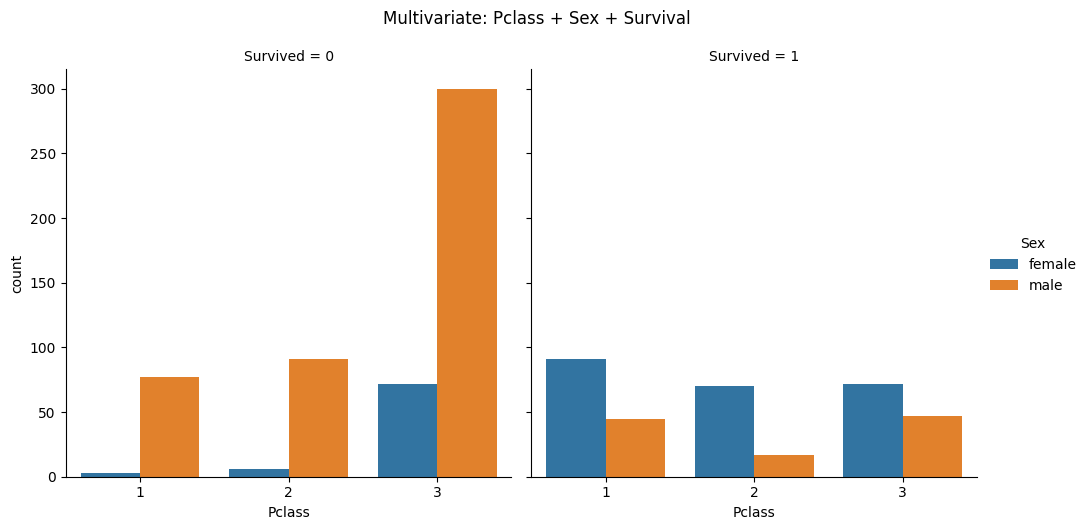

In [12]:
# Gender vs Pclass vs Survival
plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', hue='Sex', data=df)
plt.title("Distribusi Gender berdasarkan Kelas Penumpang")
plt.show()

plt.figure(figsize=(8,5))
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count')
plt.suptitle("Multivariate: Pclass + Sex + Survival", y=1.05)
plt.show()



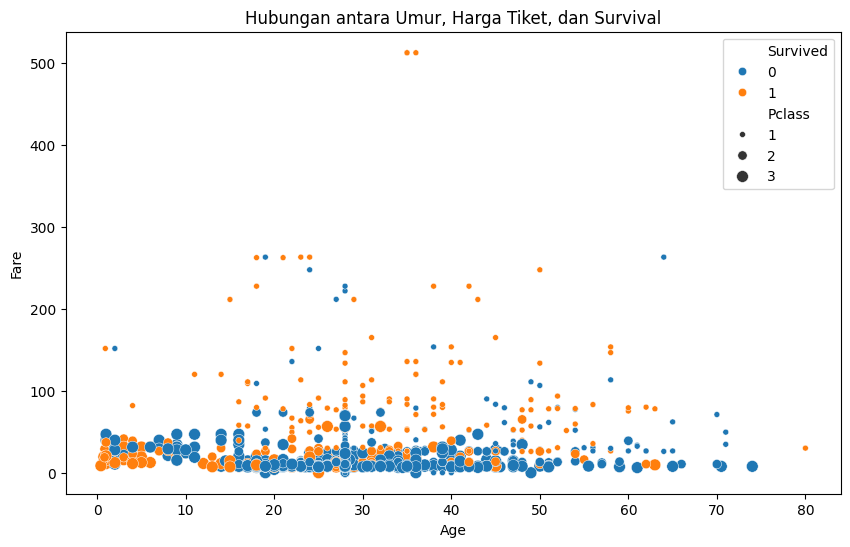

In [13]:
# Age vs Fare vs Survival
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', size='Pclass', data=df)
plt.title("Hubungan antara Umur, Harga Tiket, dan Survival")
plt.show()


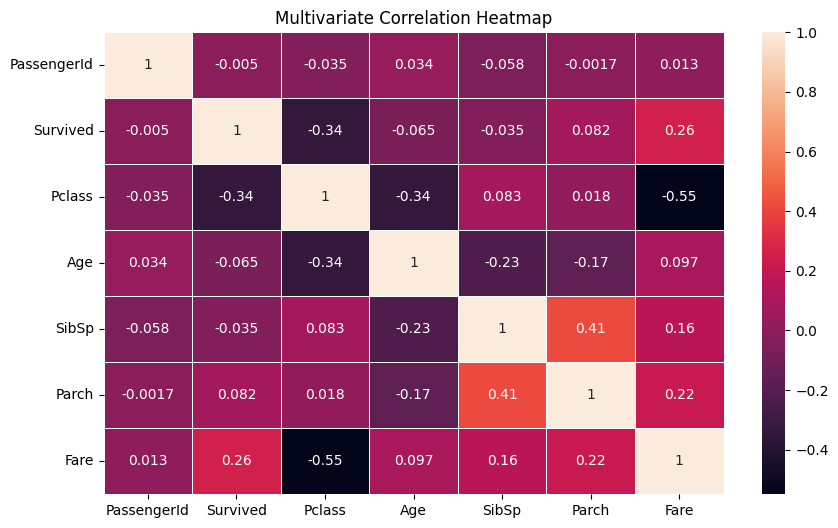

In [14]:
# Heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=0.5)
plt.title("Multivariate Correlation Heatmap")
plt.show()

**Penjelasan Multivariate:**
- Penumpang perempuan di kelas 1 punya survival rate paling tinggi.
- Semakin tinggi Fare (harga tiket) dan semakin muda umur, peluang hidup meningkat.
- Ada hubungan antara Pclass dan Fare (kelas lebih tinggi,tiket lebih mahal).

# **BIVARIATE ANALYSIS**
(hubungan antara dua variabel, bisa numerik atau kategorikal.)

Mengetahui apakah satu variabel berpengaruh terhadap variabel lain.
Misalnya
- “Apakah kelas tiket memengaruhi peluang seseorang untuk selamat?”


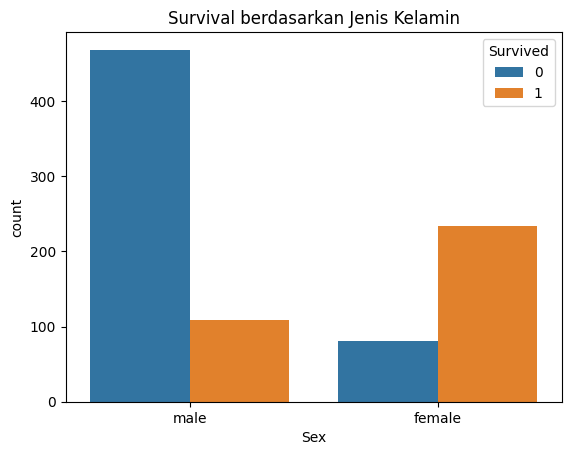

In [15]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival berdasarkan Jenis Kelamin")
plt.show()


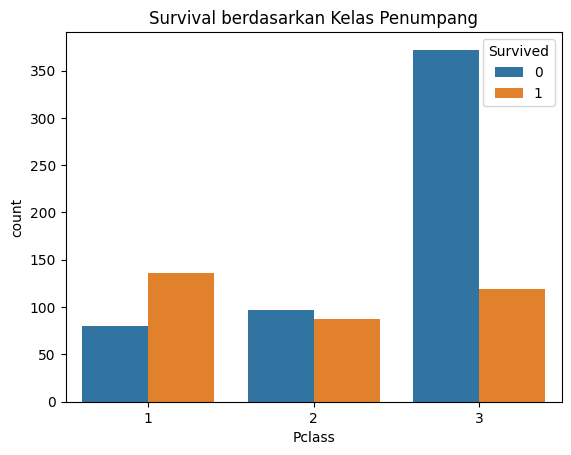

In [16]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival berdasarkan Kelas Penumpang")
plt.show()


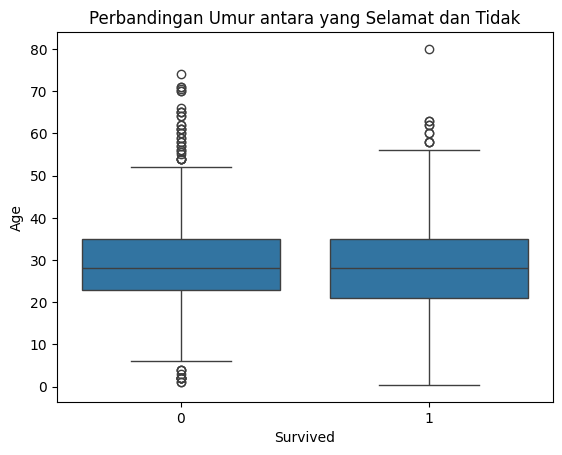

In [17]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Perbandingan Umur antara yang Selamat dan Tidak")
plt.show()

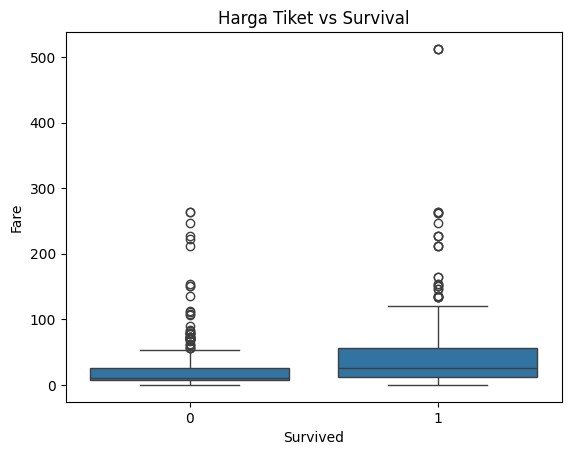

In [18]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Harga Tiket vs Survival")
plt.show()

**Penjelasan Bivariate Analysis**
- Perempuan memiliki peluang selamat jauh lebih tinggi dibanding laki-laki.
- Penumpang dari kelas 1 memiliki tingkat survival tertinggi, sedangkan kelas 3 paling rendah.
- Umur penumpang yang selamat cenderung lebih muda dibanding yang tidak selamat.
- Harga tiket (Fare) yang lebih tinggi berhubungan dengan peluang hidup yang lebih besar.
- Distribusi umur dan harga tiket berbeda cukup signifikan antara yang selamat dan tidak.

# **KORELASI DAN HEATMAP**

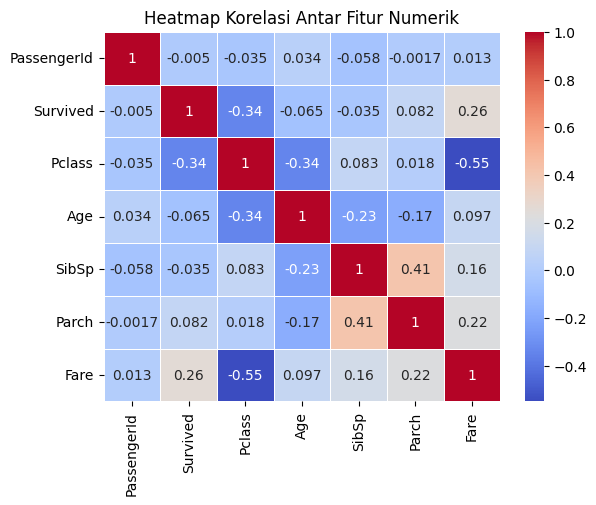

In [19]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

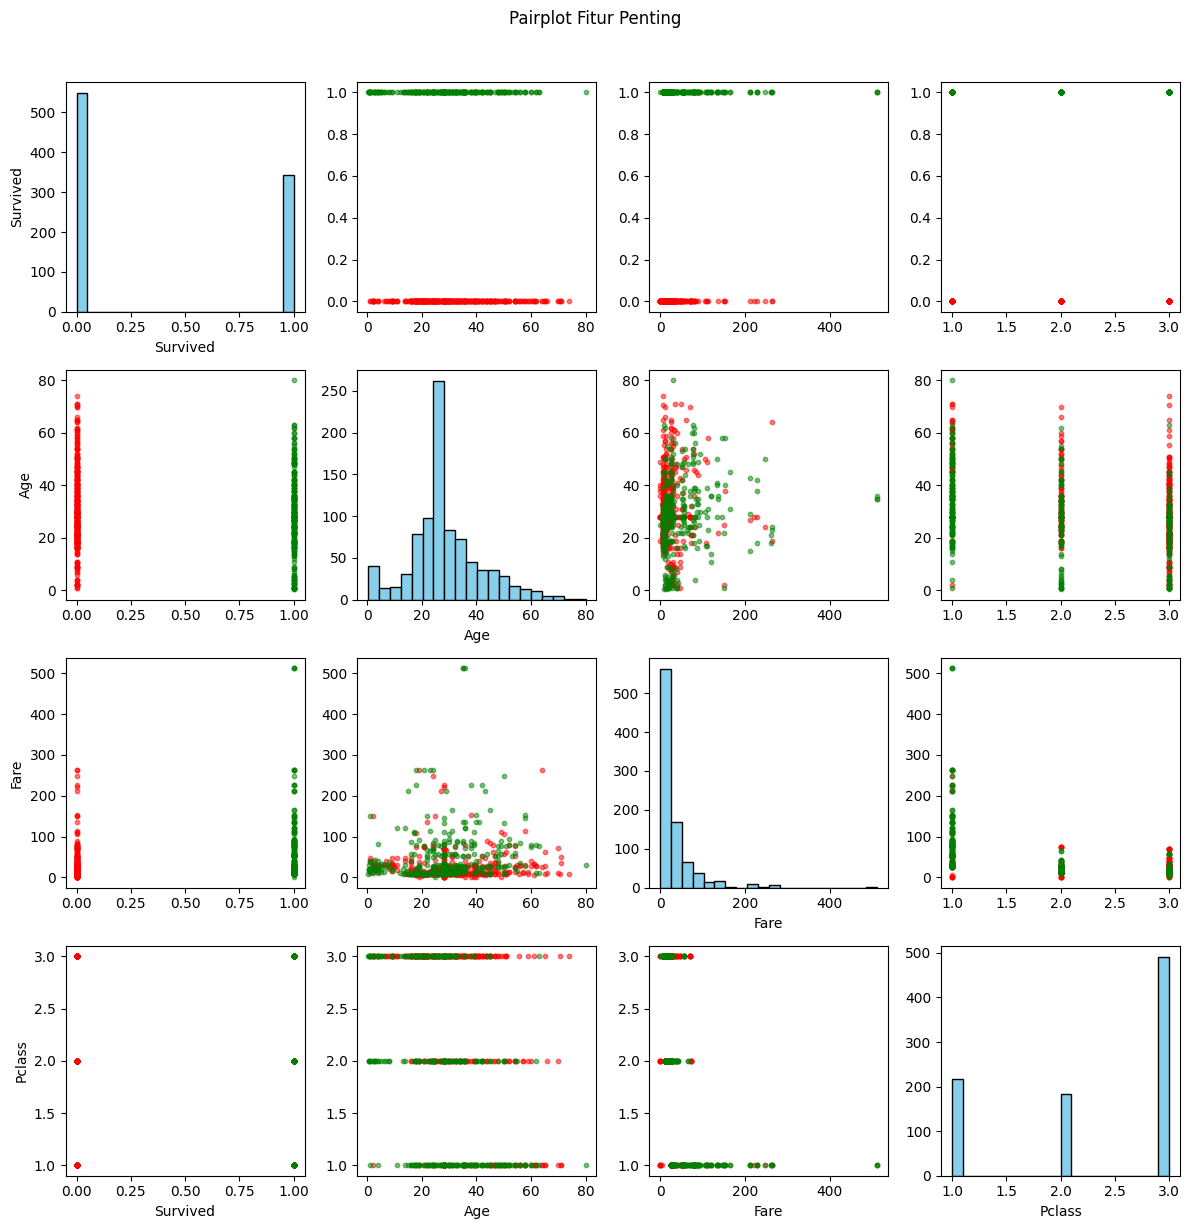

In [24]:
cols = ['Survived', 'Age', 'Fare', 'Pclass']
data = df[cols]

# Buat grid subplot
n = len(cols)
fig, axes = plt.subplots(n, n, figsize=(12, 12))
for i, col1 in enumerate(cols):
    for j, col2 in enumerate(cols):
        ax = axes[i, j]
        if i == j:
            ax.hist(data[col1], bins=20, color='skyblue', edgecolor='black')
            ax.set_ylabel('')
            ax.set_xlabel(col1)
        else:
            for val, color in zip([0,1], ['red', 'green']):
                subset = data[data['Survived'] == val]
                ax.scatter(subset[col2], subset[col1], alpha=0.5, label=f"Survived {val}", color=color, s=10)
        if j == 0:
            ax.set_ylabel(col1)
        if i == n - 1:
            ax.set_xlabel(col2)
plt.suptitle("Pairplot Fitur Penting", y=1.02)
plt.tight_layout()
plt.show()

# **OUTLIER DETECTION**

In [21]:
def plot_outlier(col):
    sns.boxplot(df[col])
    plt.title(f"Boxplot Outlier pada Kolom {col}")
    plt.show()

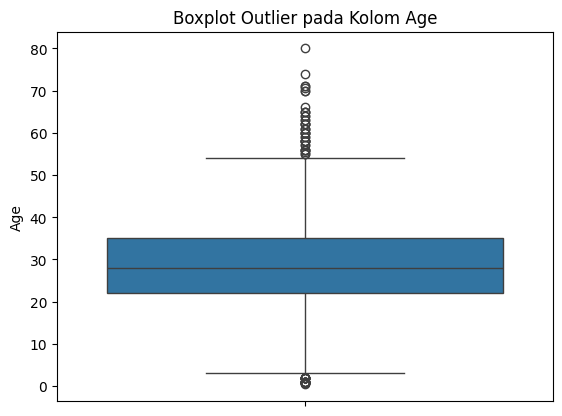

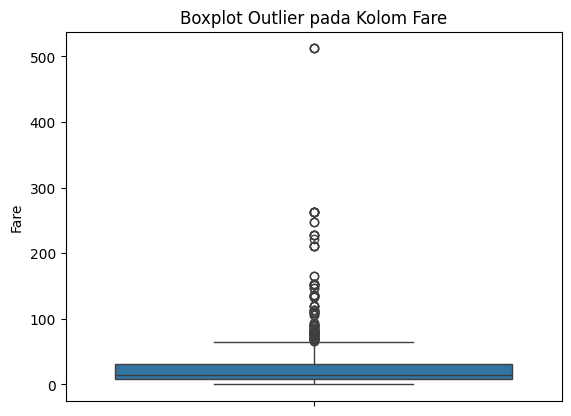

In [22]:
for col in ['Age', 'Fare']:
    plot_outlier(col)

Fare IQR bounds: -26.724 65.6344
Outliers above upper bound: 116


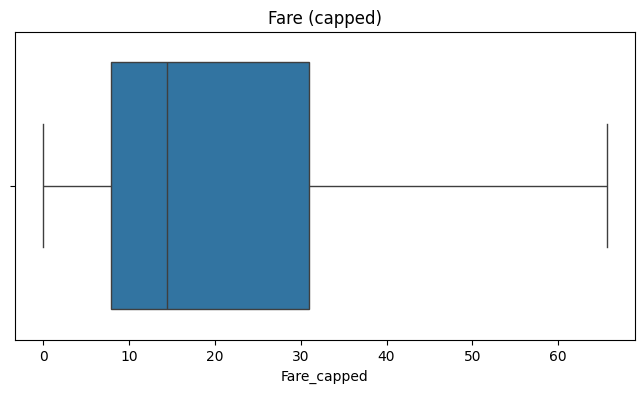

In [23]:
fare = df['Fare']
q1, q3 = fare.quantile(0.25), fare.quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
print('Fare IQR bounds:', lower, upper)
print('Outliers above upper bound:', (fare > upper).sum())

# Cap fares
df['Fare_capped'] = np.where(df['Fare'] > upper, upper, df['Fare'])
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Fare_capped'])
plt.title('Fare (capped)')
plt.show()

**KESIMPULAN EDA:**

1. Missing values ditemukan terutama pada kolom Age, Cabin, dan Embarked.
2. Penumpang perempuan memiliki peluang selamat lebih tinggi.
3. Kelas 1 memiliki tingkat survival tertinggi dibanding kelas 3.
4. Umur lebih muda cenderung memiliki survival rate lebih tinggi.
5. Harga tiket (Fare) berhubungan positif dengan peluang selamat.